In [64]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os
import matplotlib.pyplot as plt

In [ ]:
file_path = r"../data/at-dataset/Scats_Data.csv"
file_path = r"../data/at-dataset/Scats_Data.csv"

df = pd.read_csv(file_path, sep="\t")

df[["Detector_ID", "Lane"]] = df["Detector"].str.split("-", expand=True)
df = df.drop(columns=["Detector"])
df["Detector_ID"] = pd.to_numeric(df["Detector_ID"], errors="coerce")
df["Lane"] = pd.to_numeric(df["Lane"], errors="coerce")
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%Y-%m-%d %H:%M")

df = df.drop_duplicates(subset=["Detector_ID", "Lane", "DateTime"])

In [41]:
df.set_index("DateTime", inplace=True)

In [68]:
## sort df based on datetime, site, lane
df = df.sort_values(by=['DateTime', 'Detector_ID', 'Lane'])

In [76]:
site = df['Detector_ID'].unique()
for s in site:
    site_df = df[df['Detector_ID'] == s]
    lane = site_df['Lane'].unique()
    lane = np.sort(lane)
    # plt.figure(figsize=(15, 5 * len(lane)))
    for i, l in enumerate(lane):
        lane_df = site_df[site_df['Lane'] == l].sort_index()
        full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1h')
        missing_times = full_range.difference(lane_df.index)
        print(f"Site: {s}, Lane: {l}, Missing timestamps: {len(missing_times)}")

Site: 2013, Lane: 1, Missing timestamps: 435
Site: 2013, Lane: 2, Missing timestamps: 435
Site: 2013, Lane: 3, Missing timestamps: 435
Site: 2013, Lane: 4, Missing timestamps: 435
Site: 2013, Lane: 5, Missing timestamps: 435
Site: 2013, Lane: 6, Missing timestamps: 435
Site: 2013, Lane: 7, Missing timestamps: 435
Site: 2013, Lane: 8, Missing timestamps: 435
Site: 2013, Lane: 9, Missing timestamps: 435
Site: 2013, Lane: 10, Missing timestamps: 435
Site: 2013, Lane: 11, Missing timestamps: 435
Site: 2013, Lane: 12, Missing timestamps: 435
Site: 2013, Lane: 13, Missing timestamps: 435
Site: 2061, Lane: 1, Missing timestamps: 220
Site: 2061, Lane: 2, Missing timestamps: 220
Site: 2061, Lane: 3, Missing timestamps: 220
Site: 2061, Lane: 4, Missing timestamps: 220
Site: 2061, Lane: 5, Missing timestamps: 220
Site: 2061, Lane: 6, Missing timestamps: 220
Site: 2061, Lane: 7, Missing timestamps: 220
Site: 2061, Lane: 8, Missing timestamps: 220
Site: 2061, Lane: 9, Missing timestamps: 220
Site: 

C:\Users\hanju\AppData\Local\Temp\ipykernel_36280\2829884104.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 5))


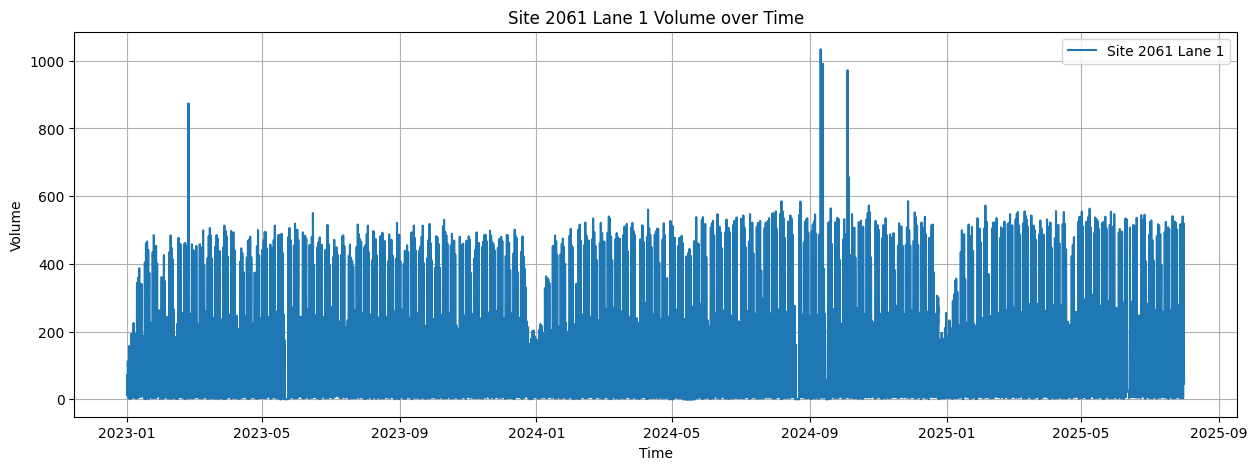

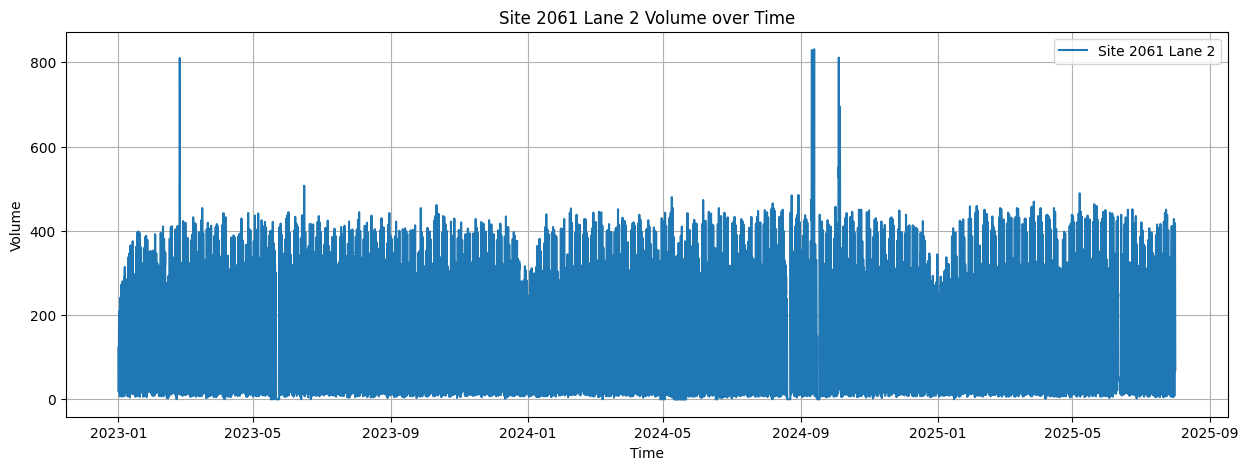

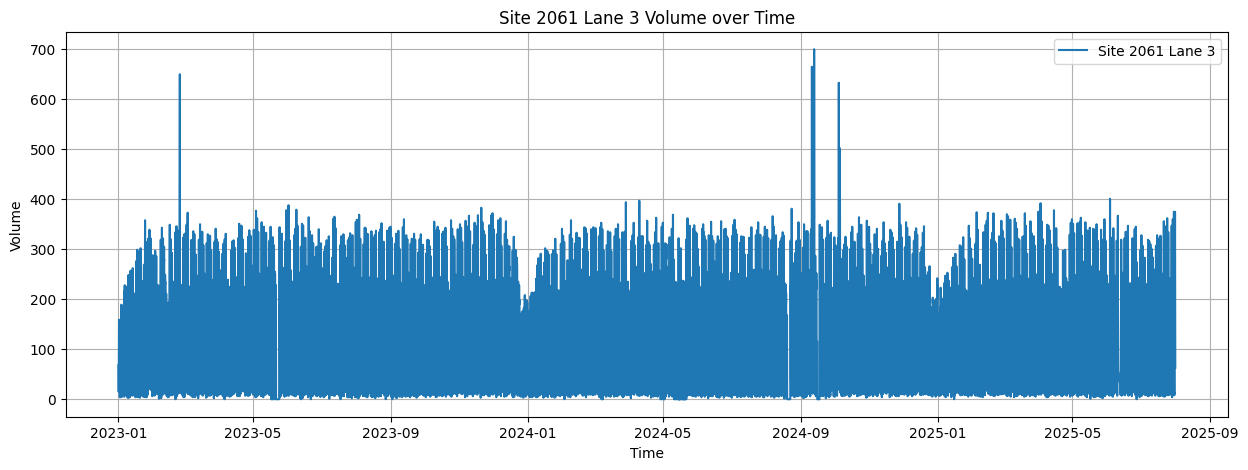

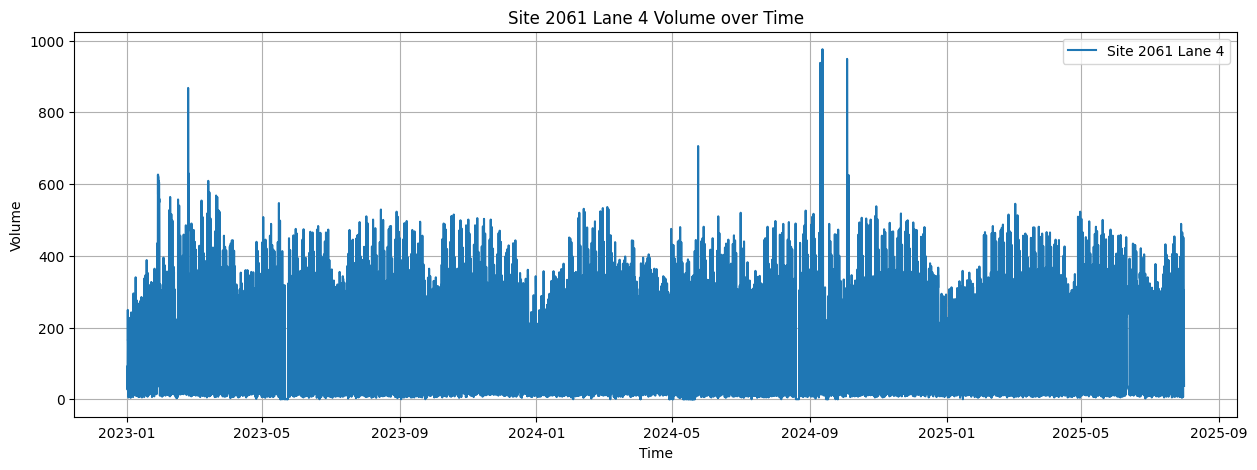

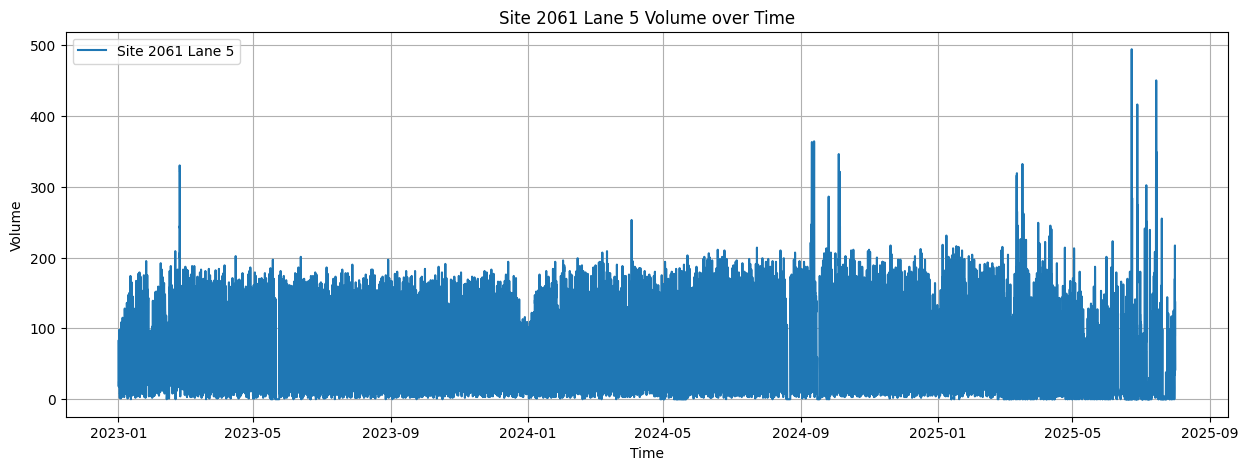

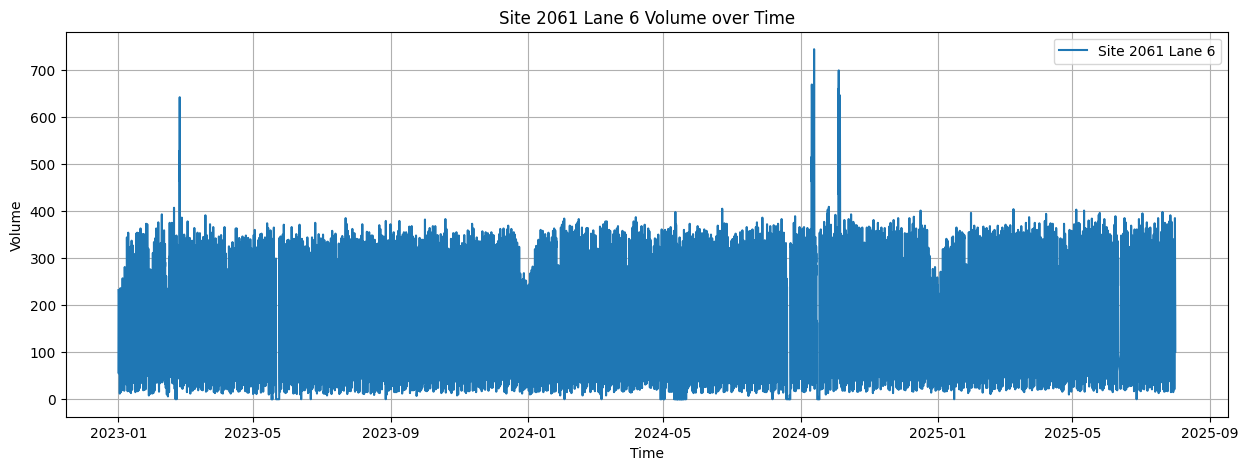

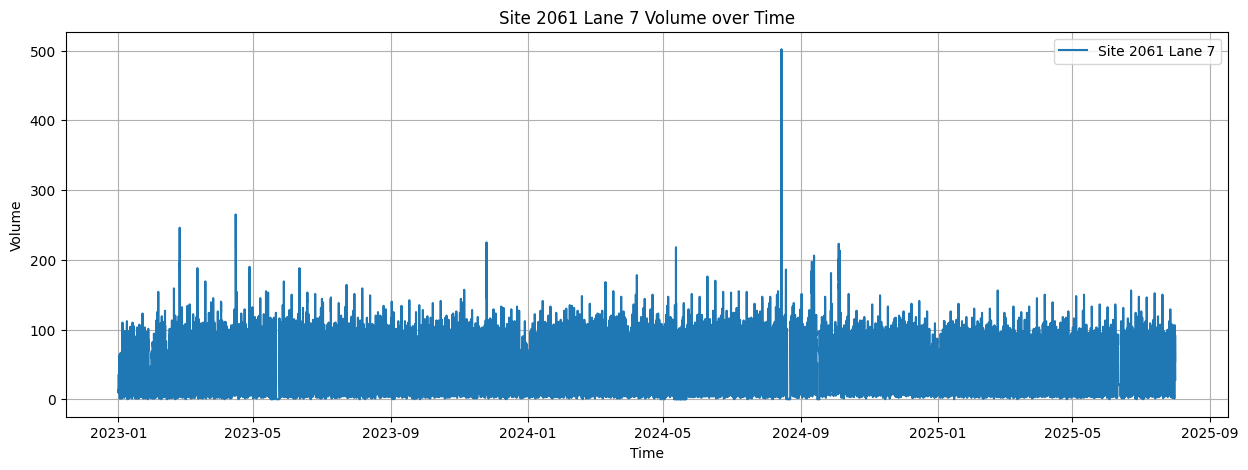

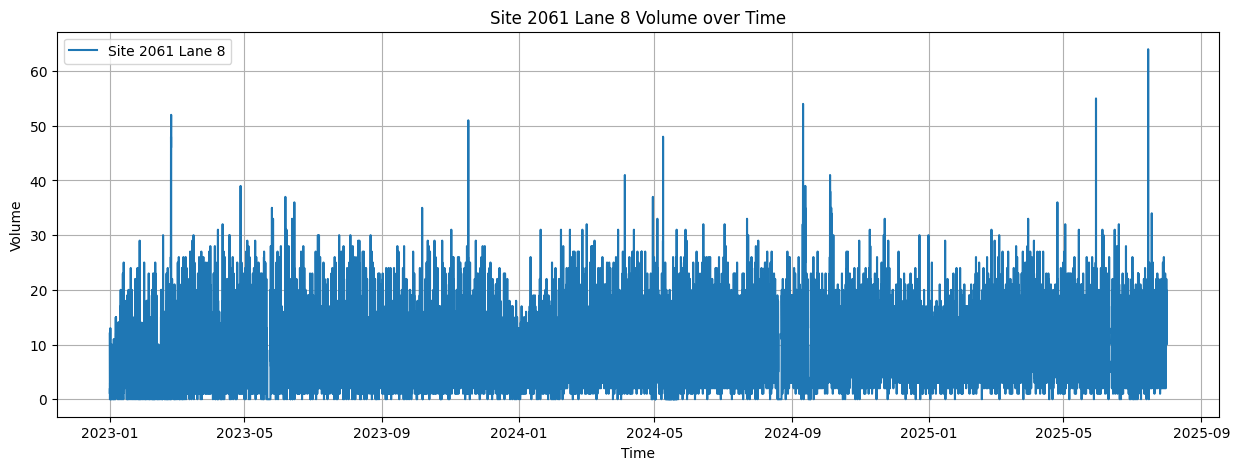

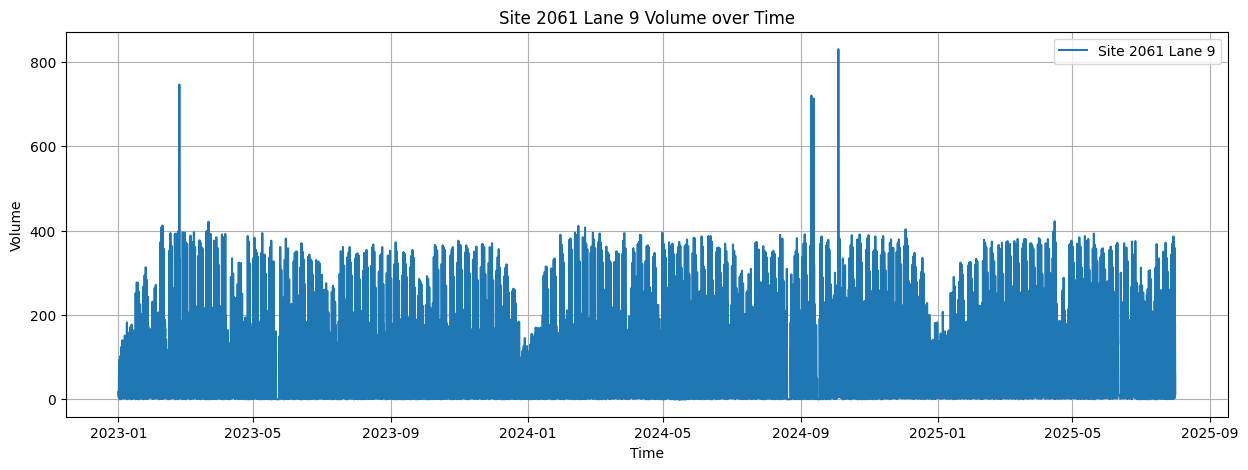

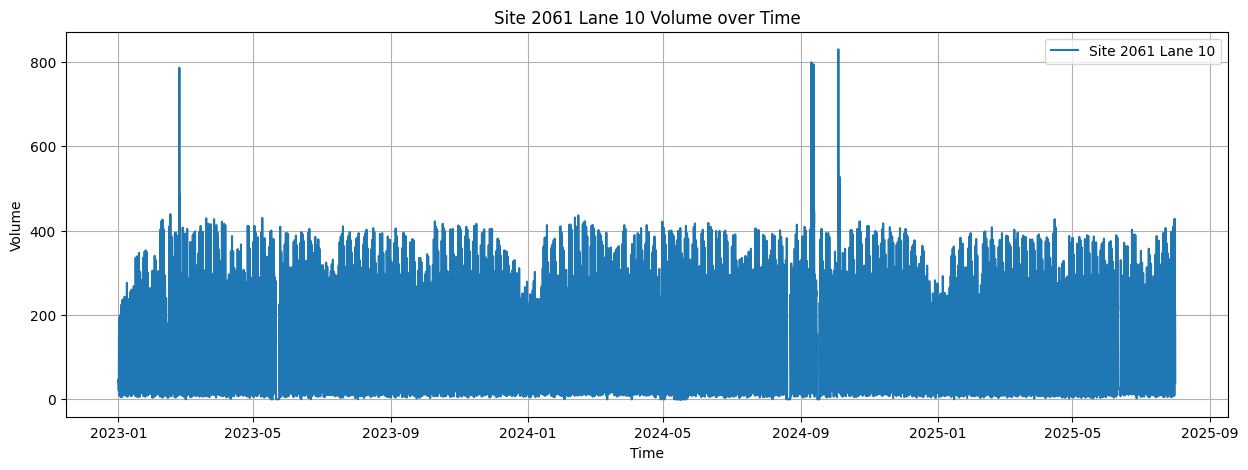

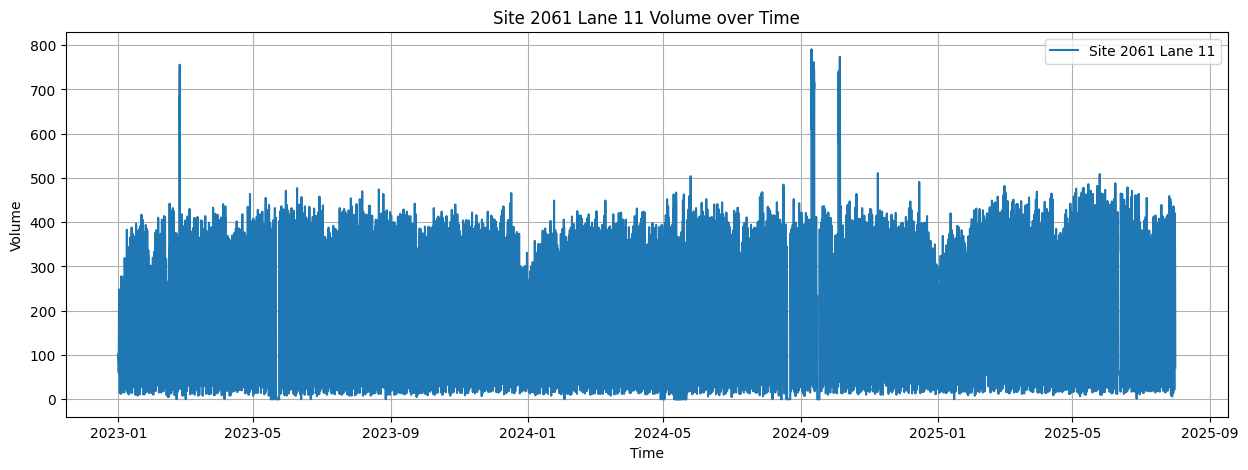

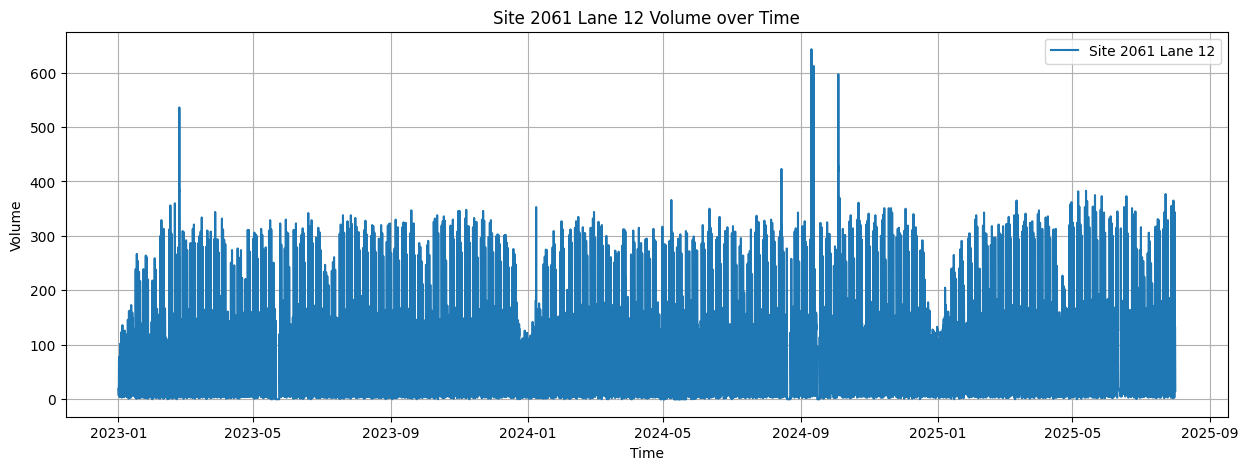

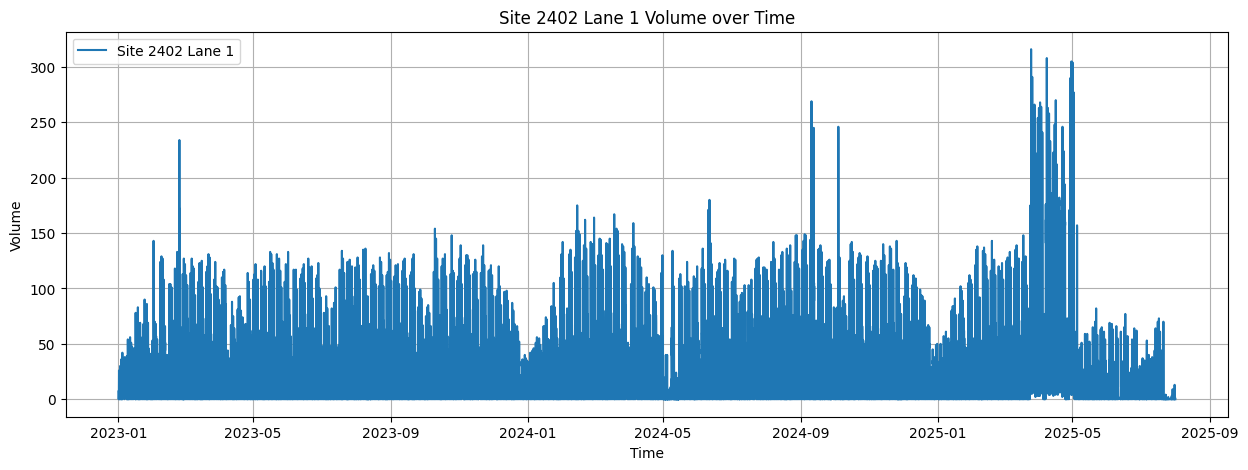

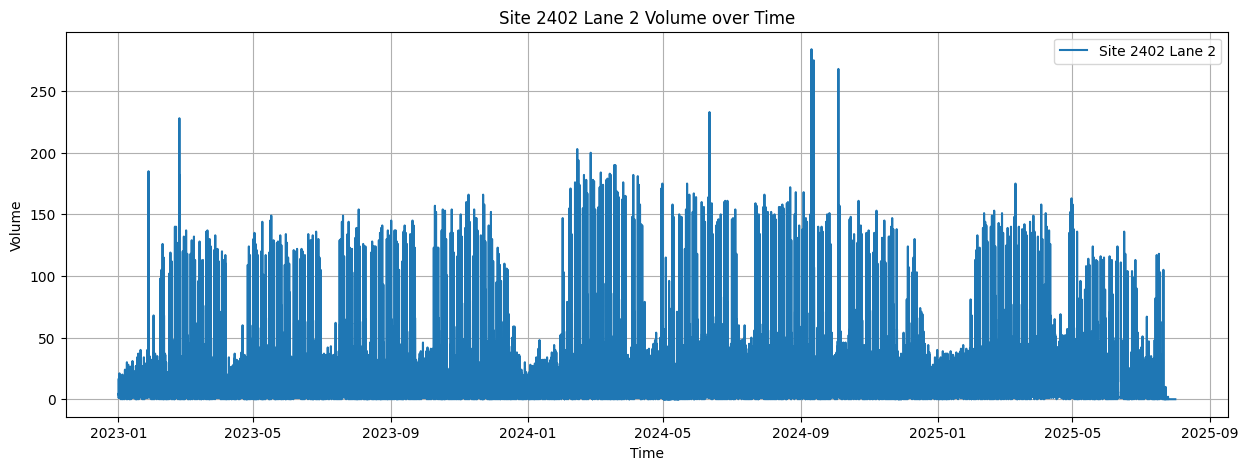

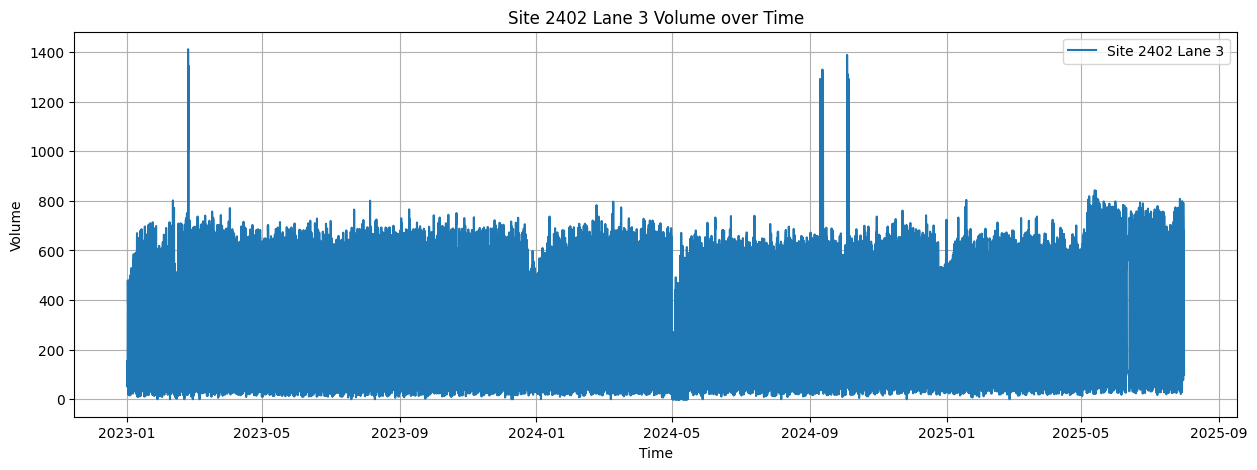

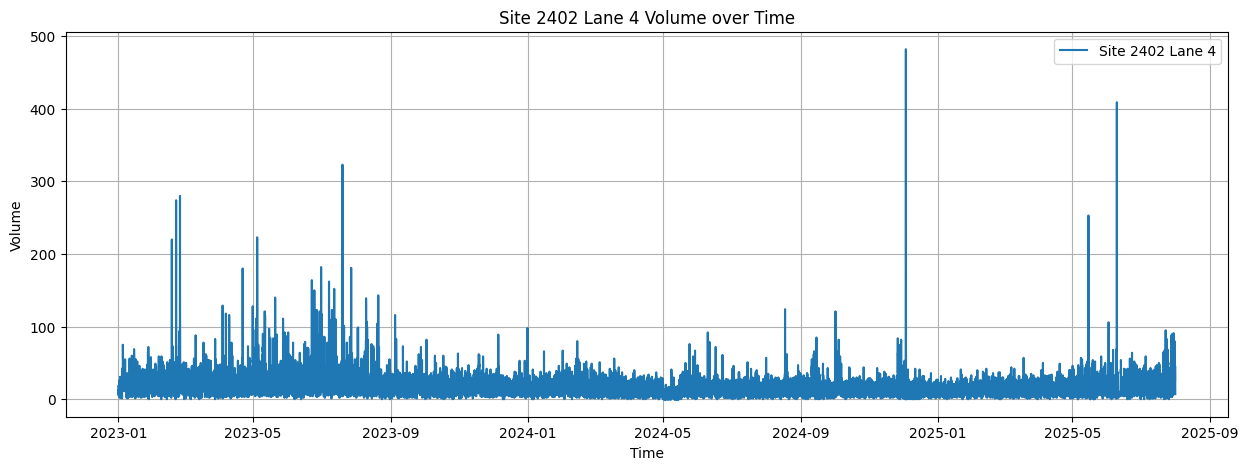

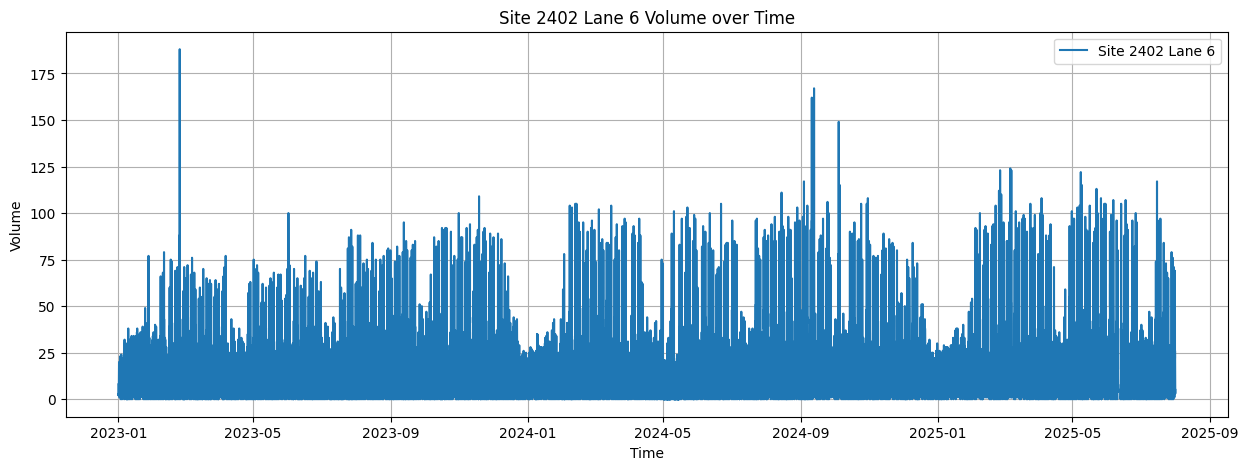

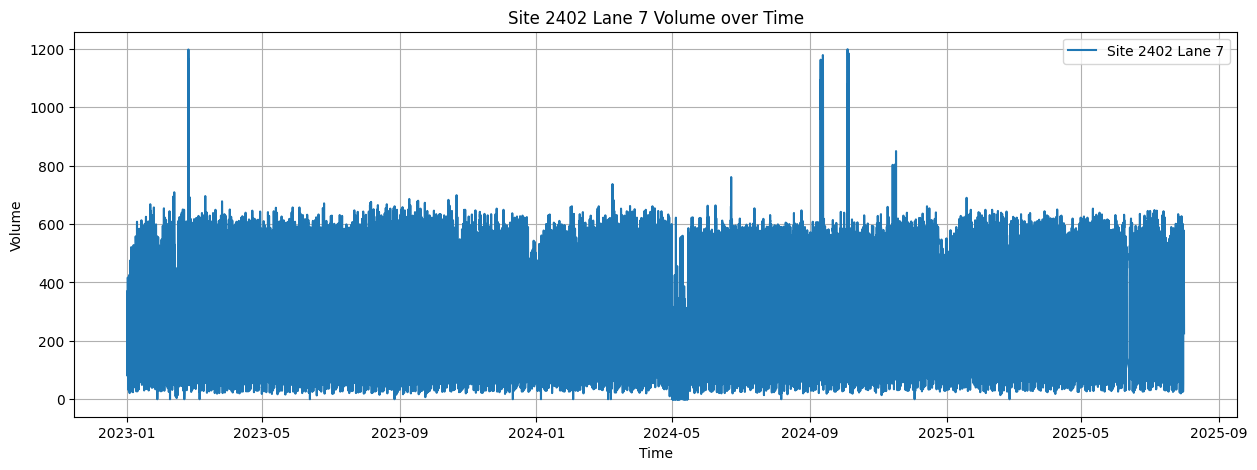

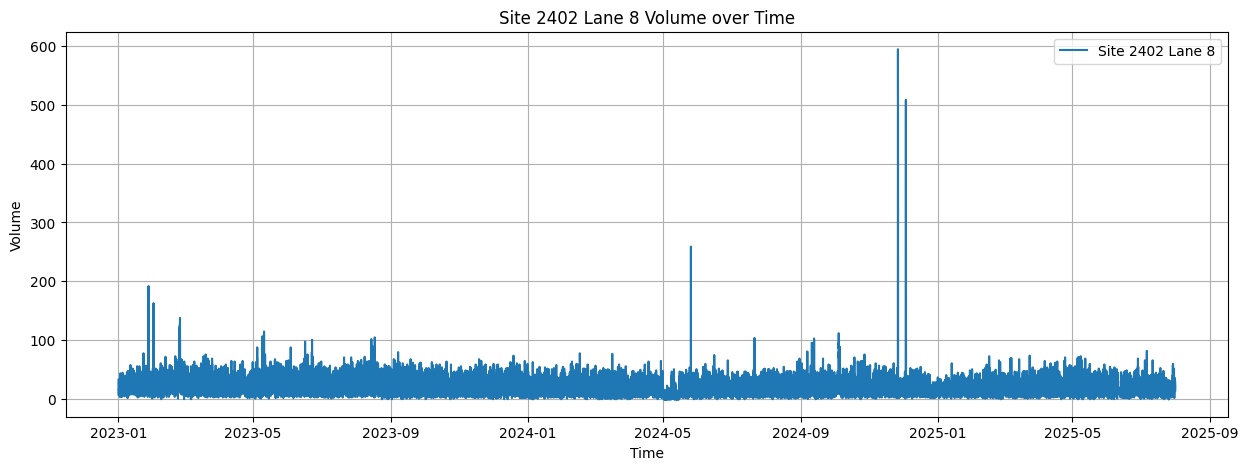

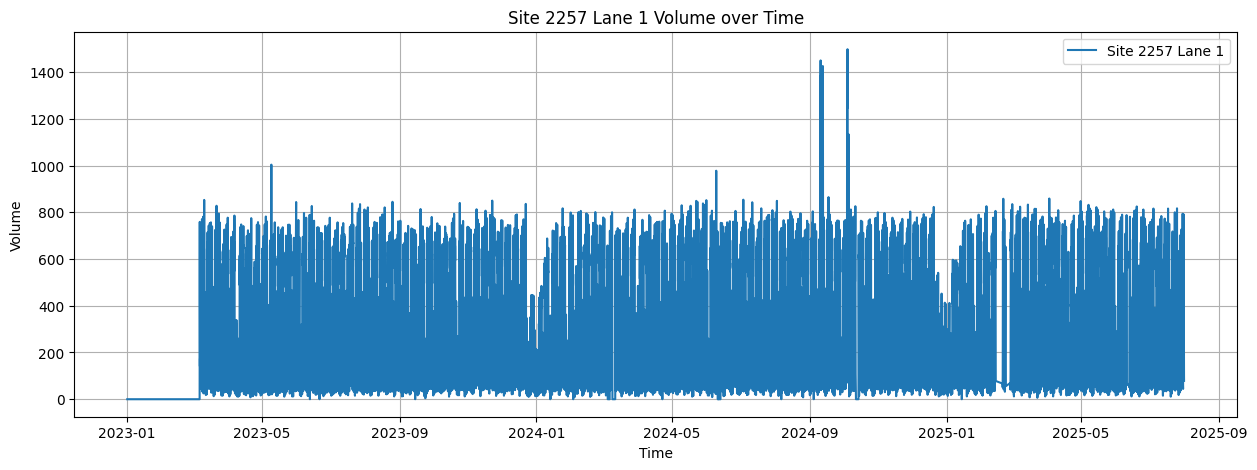

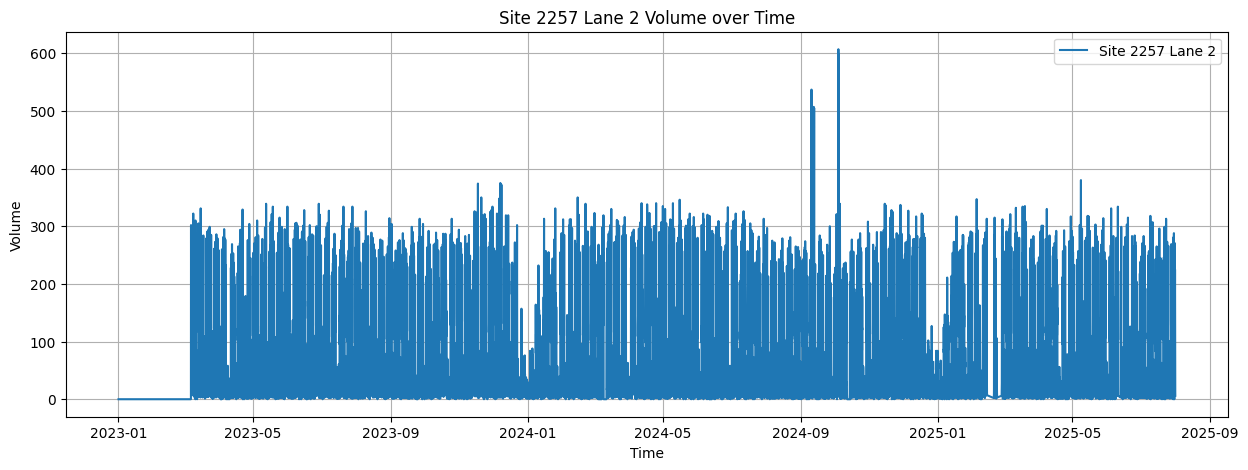

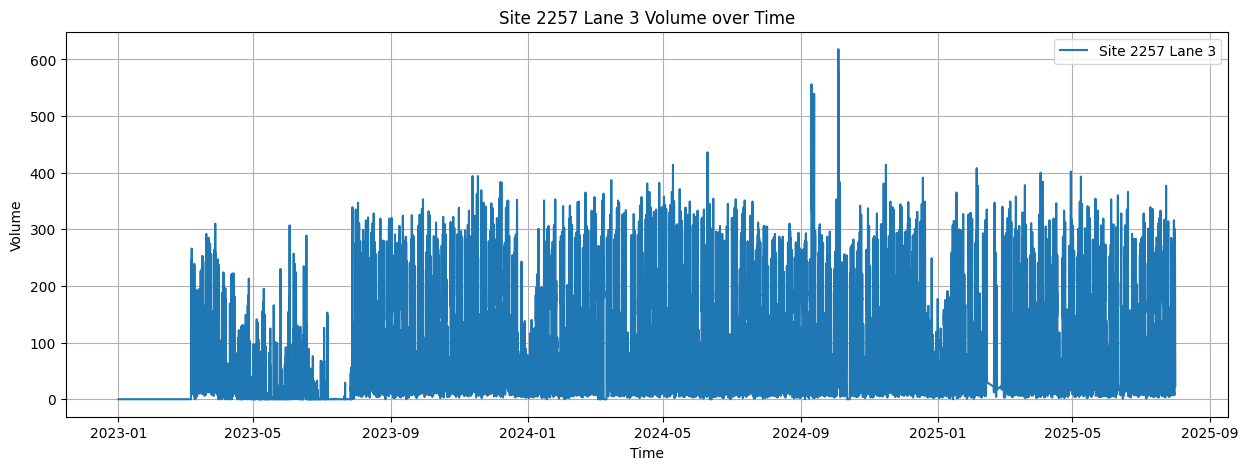

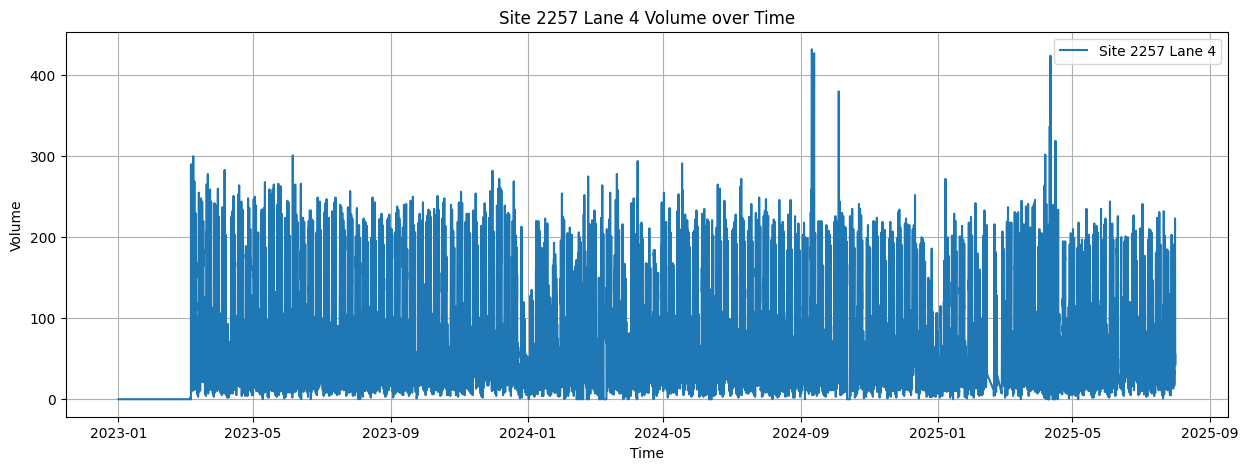

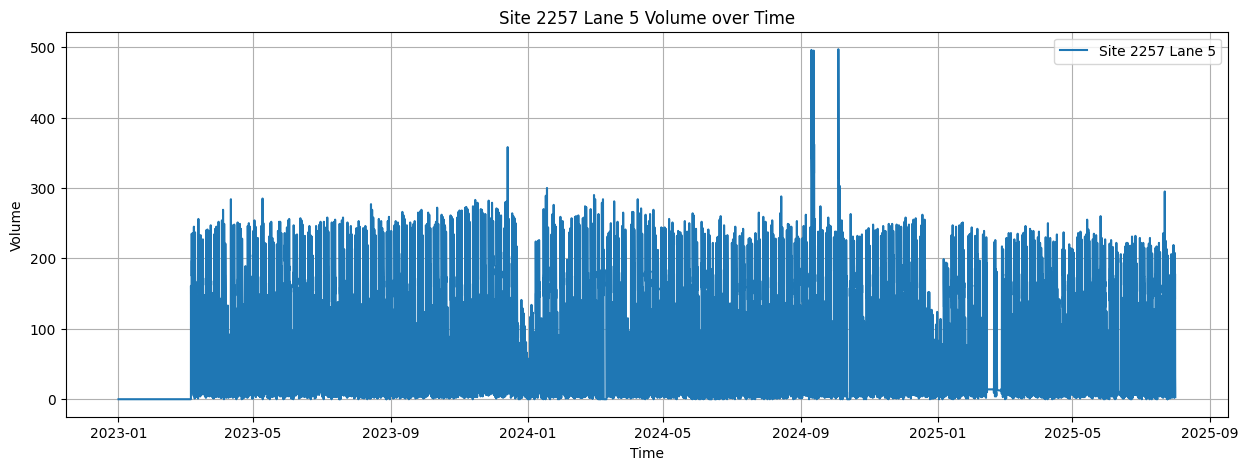

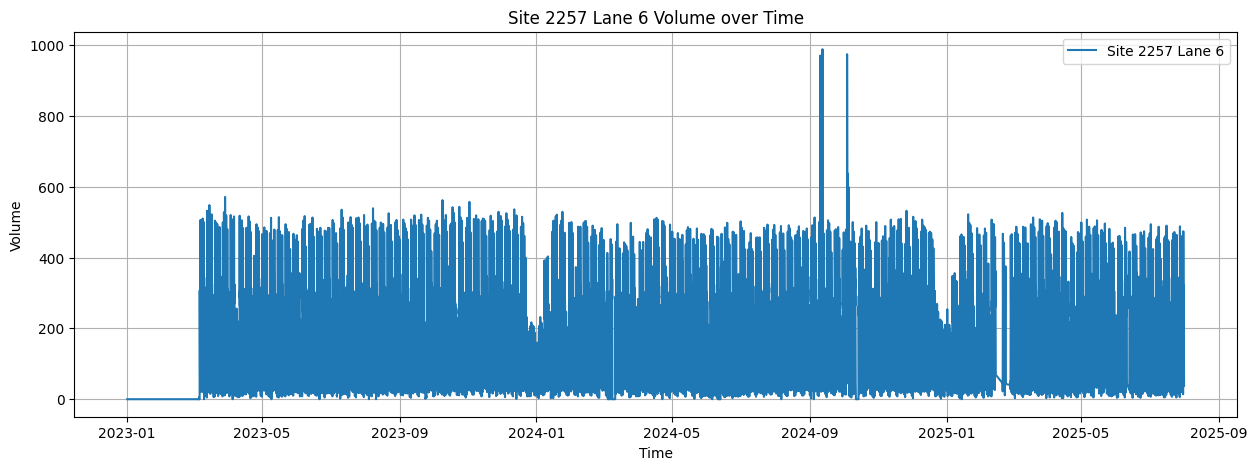

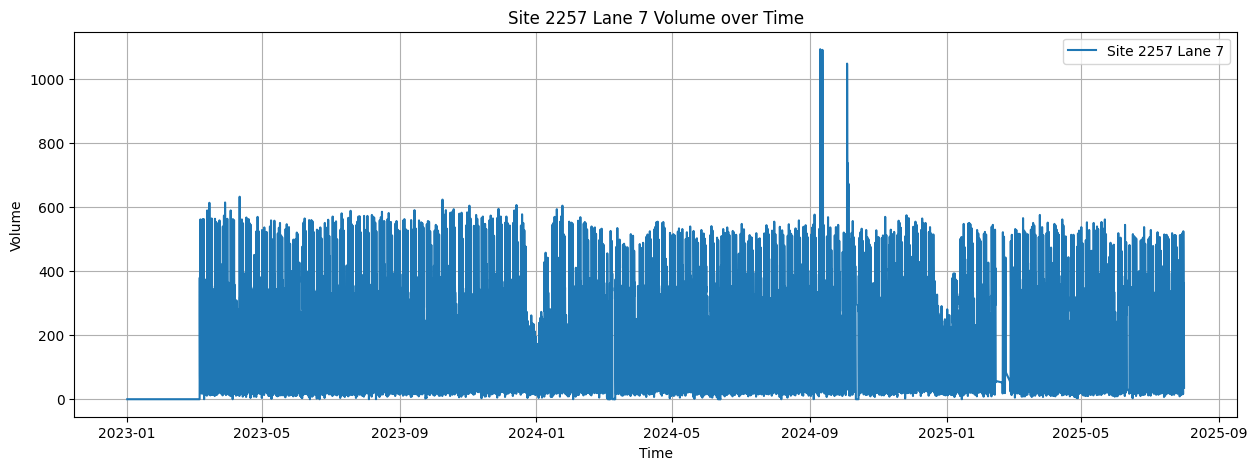

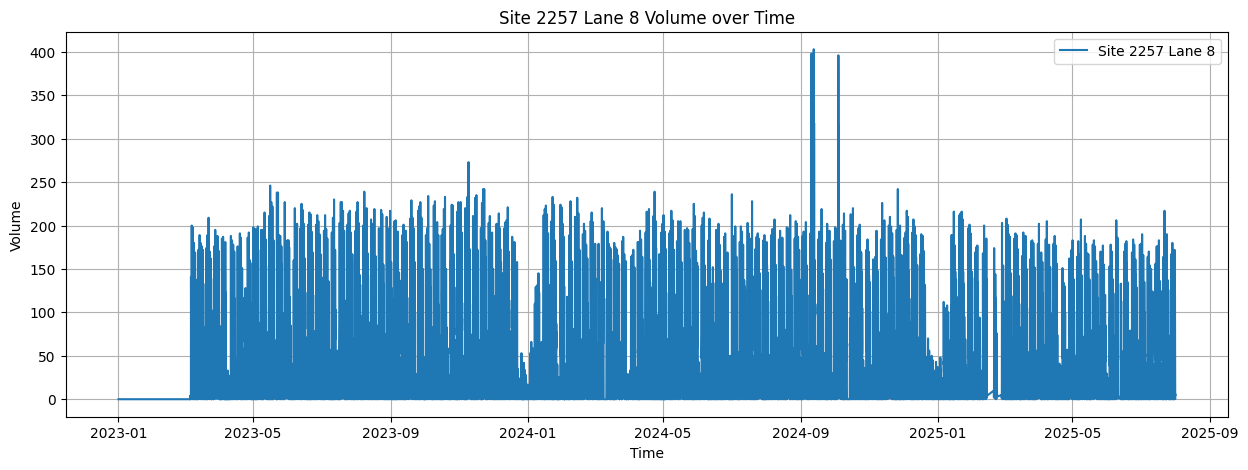

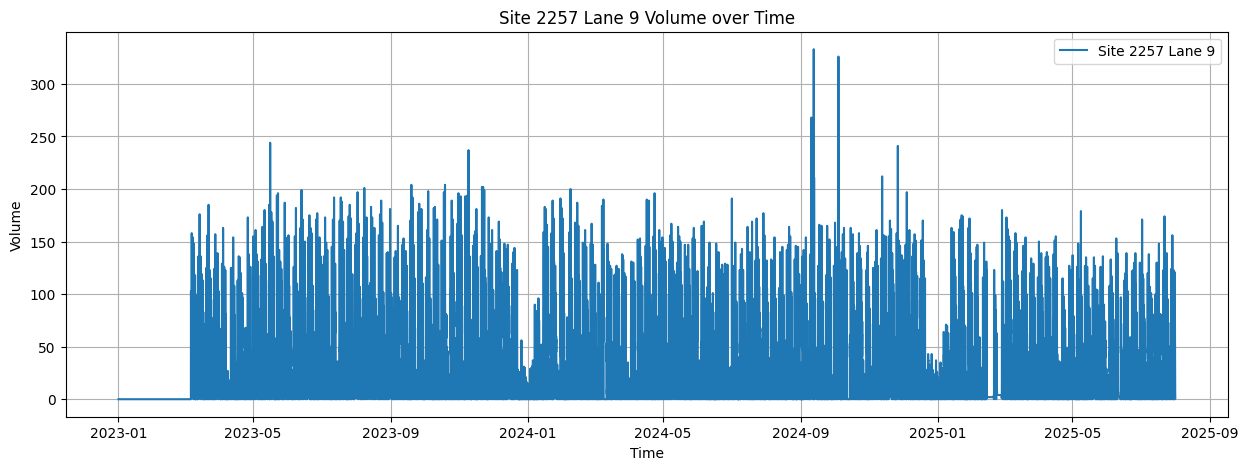

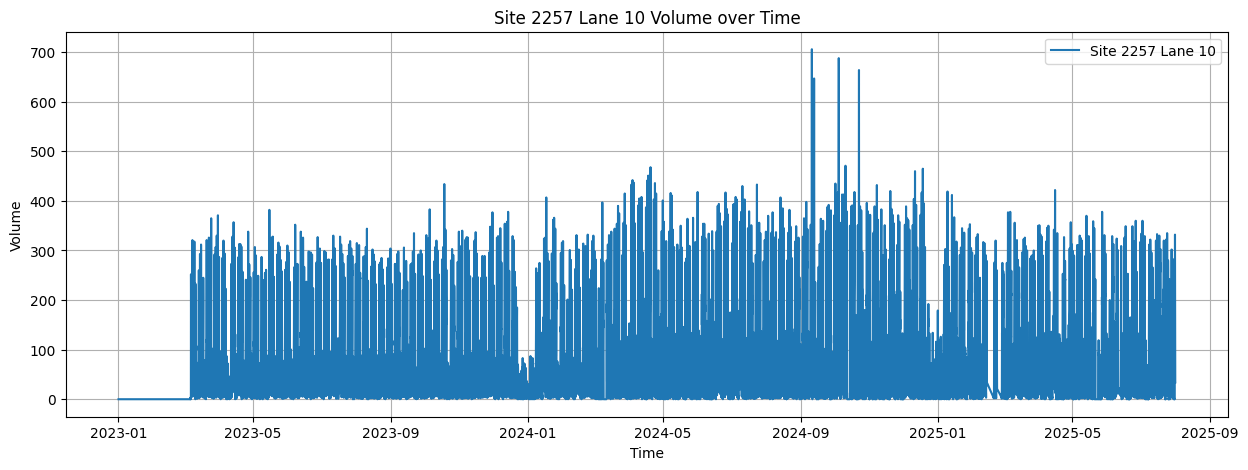

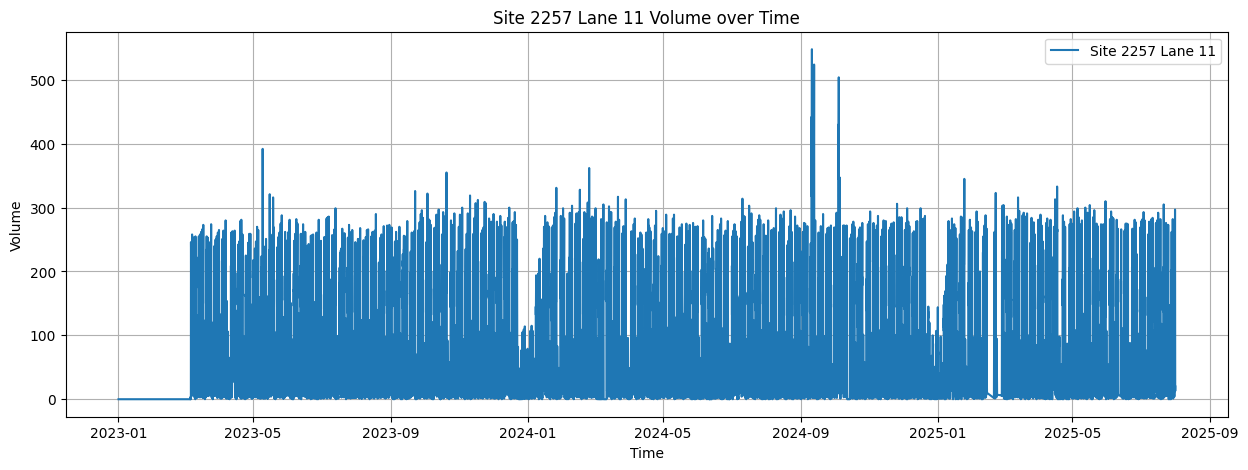

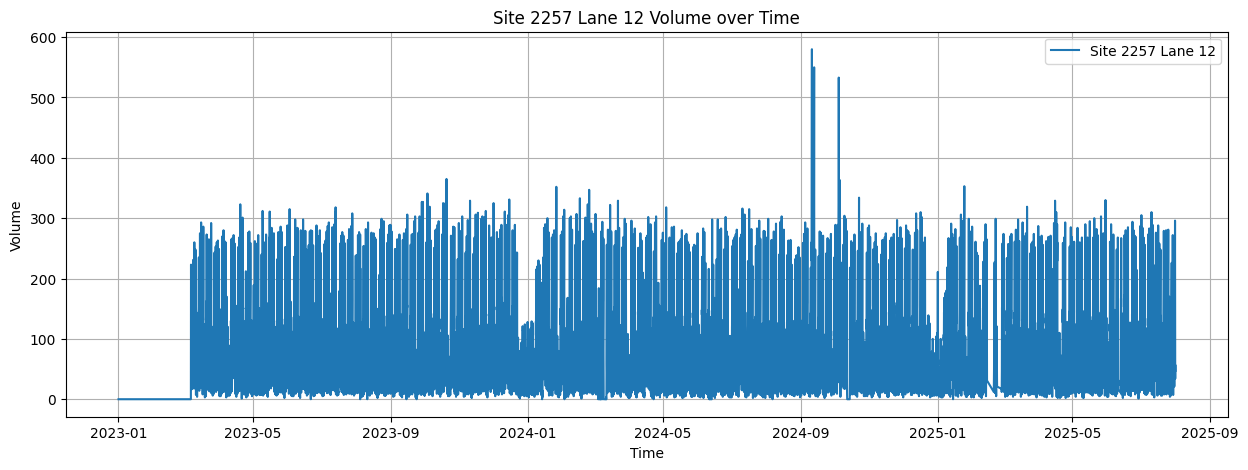

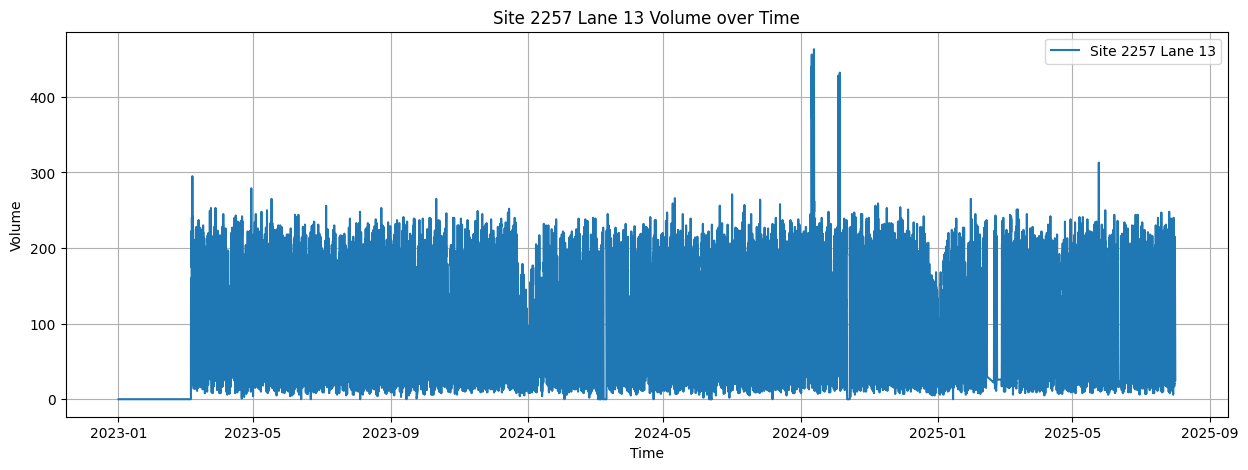

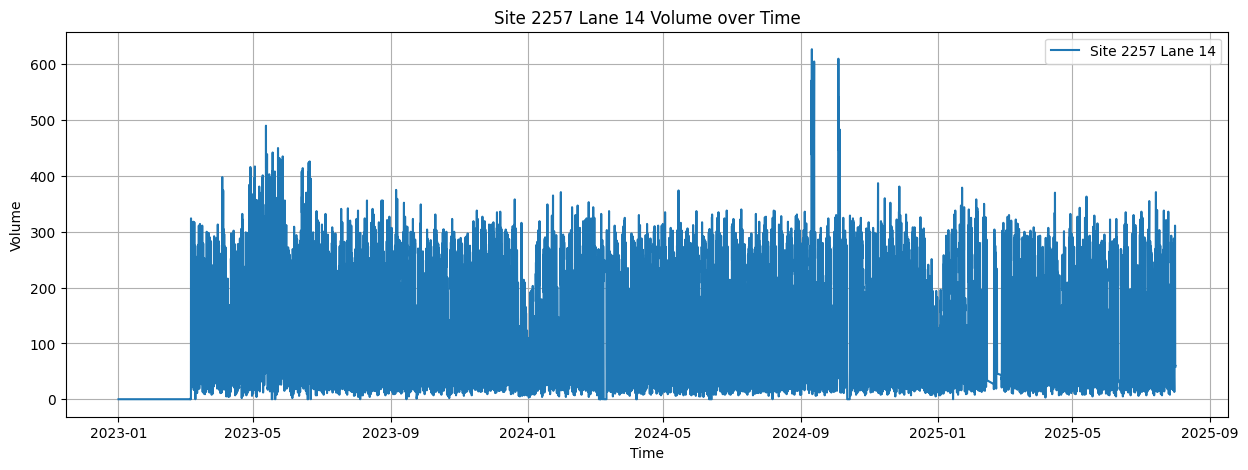

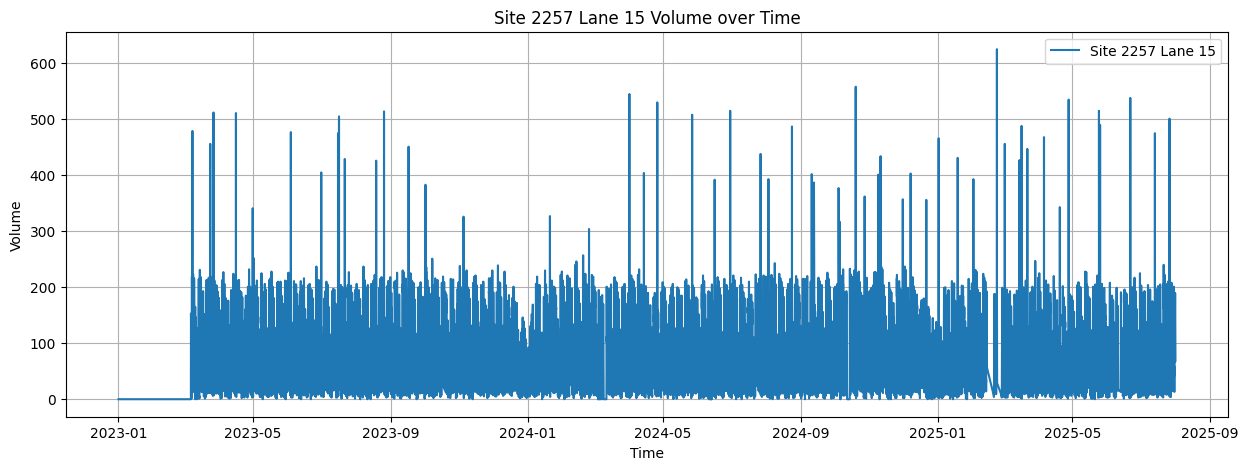

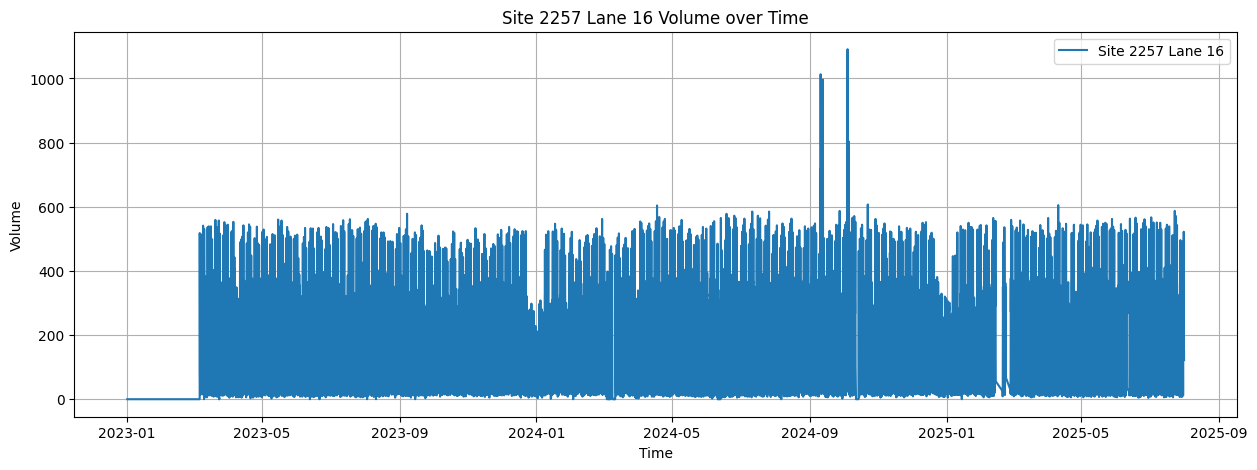

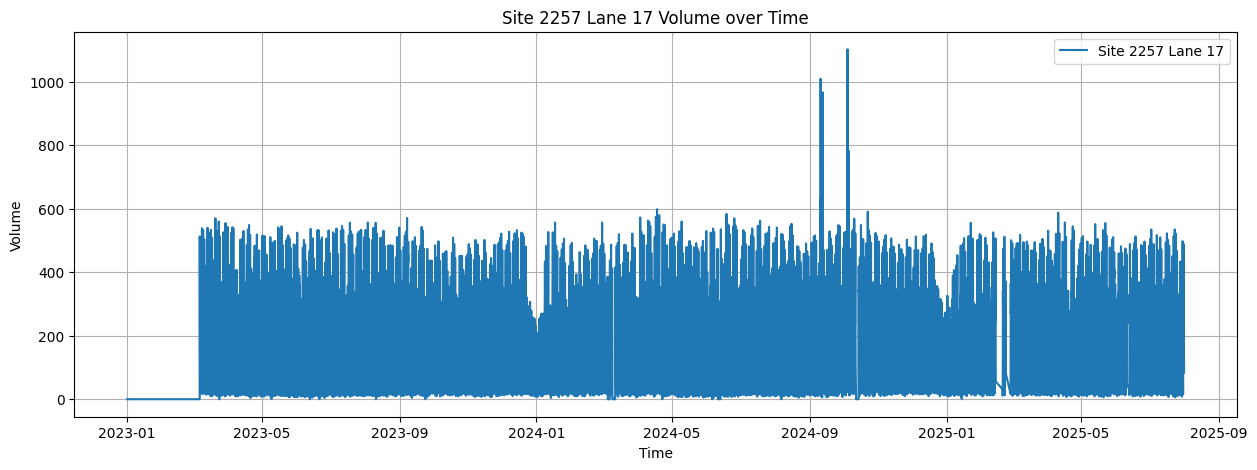

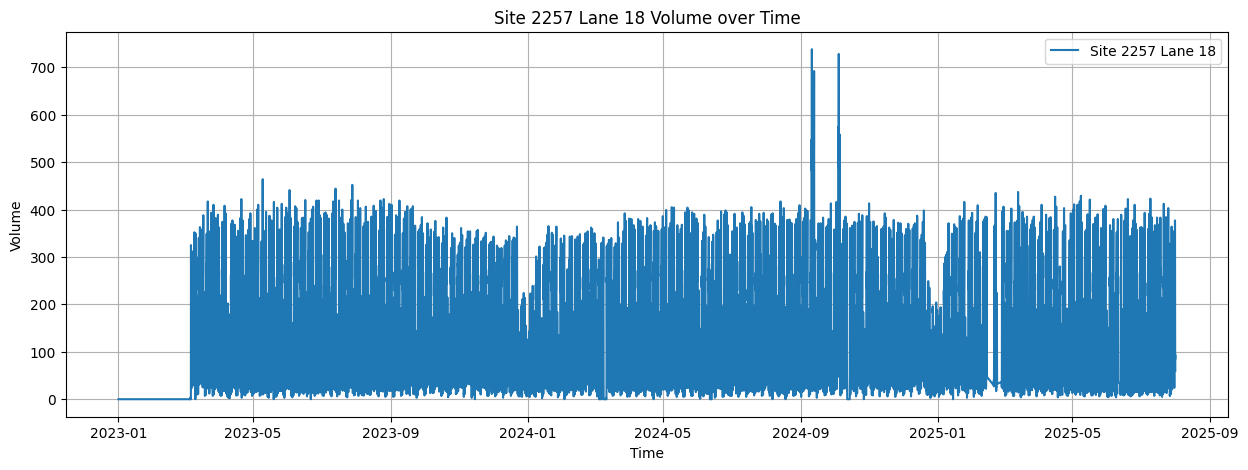

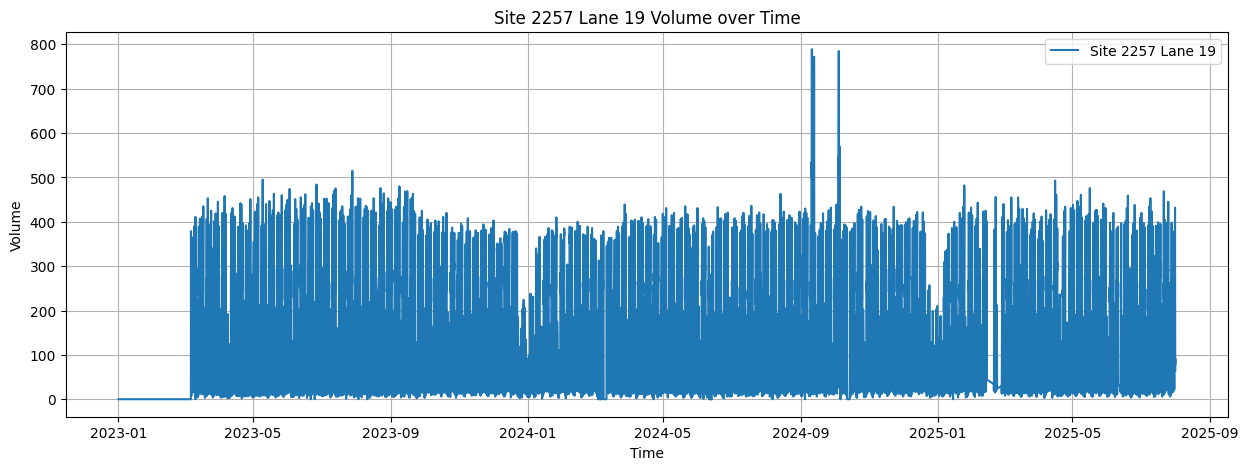

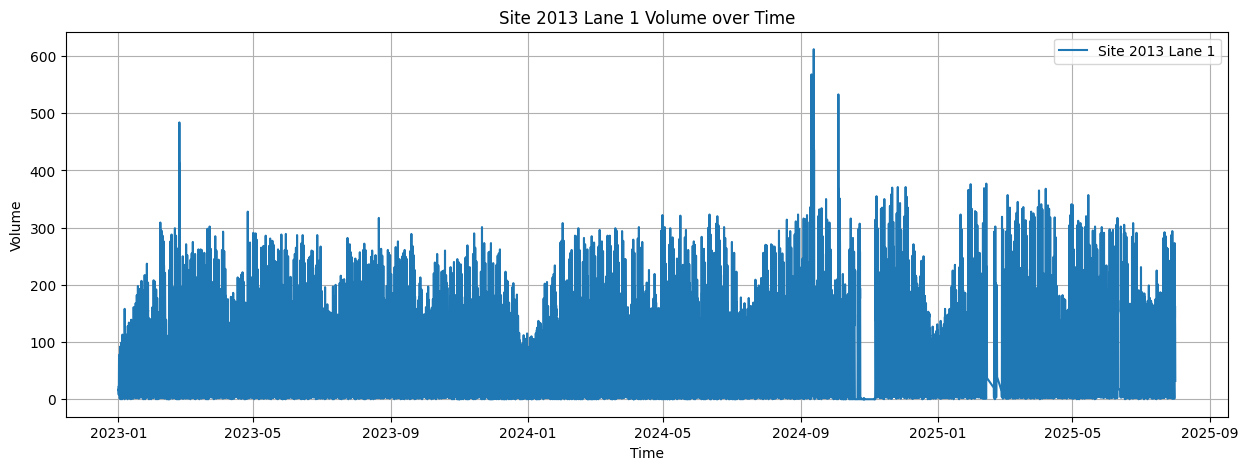

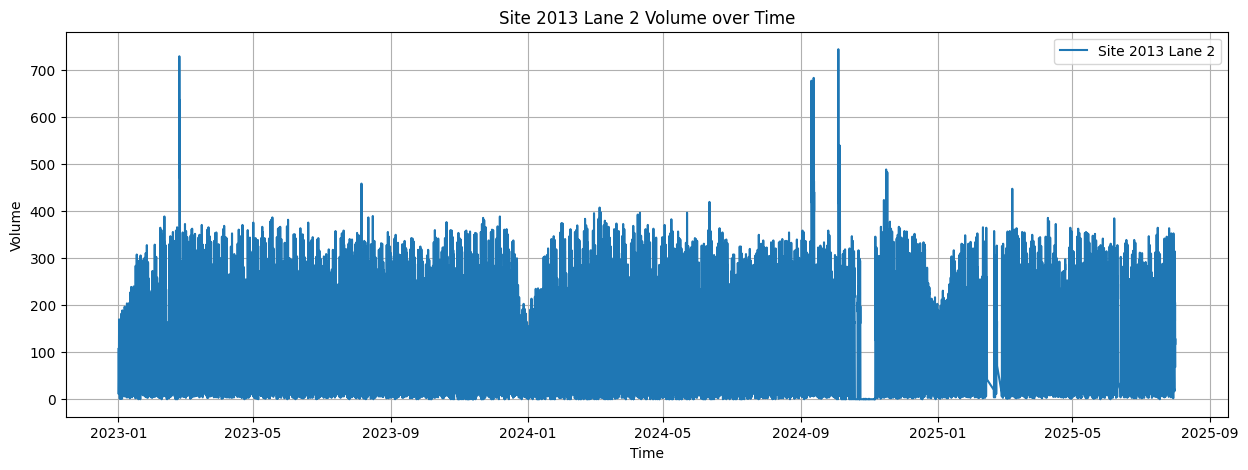

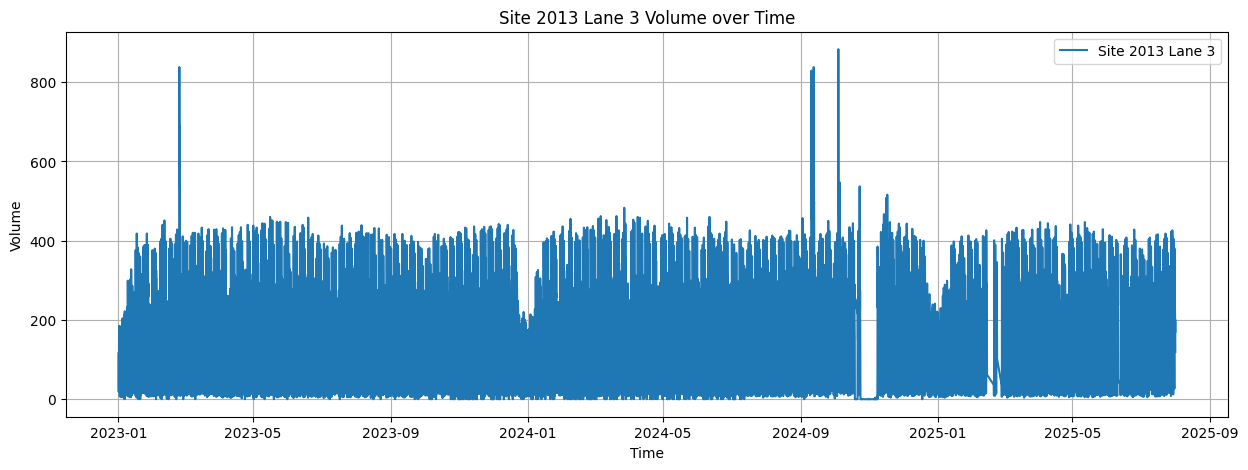

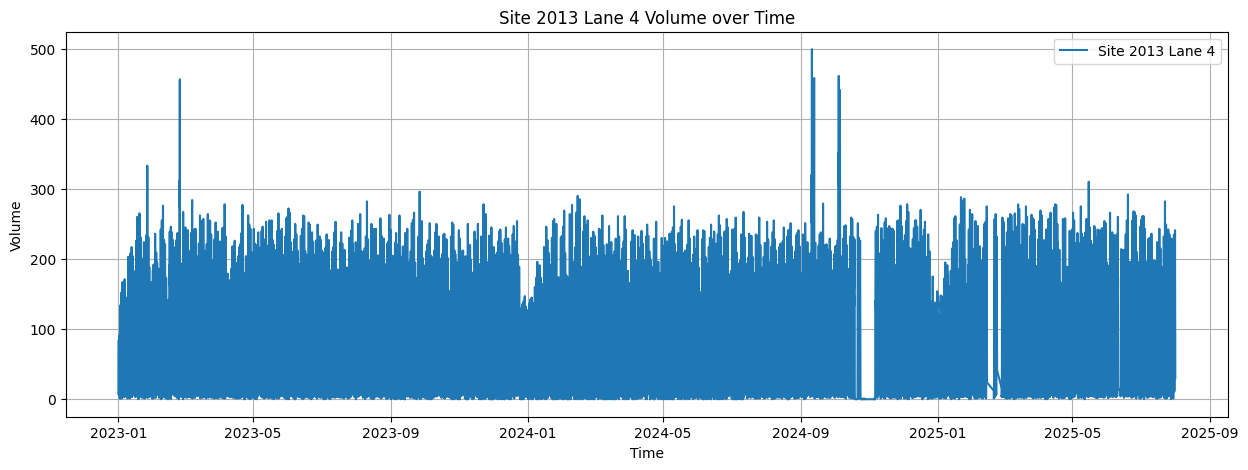

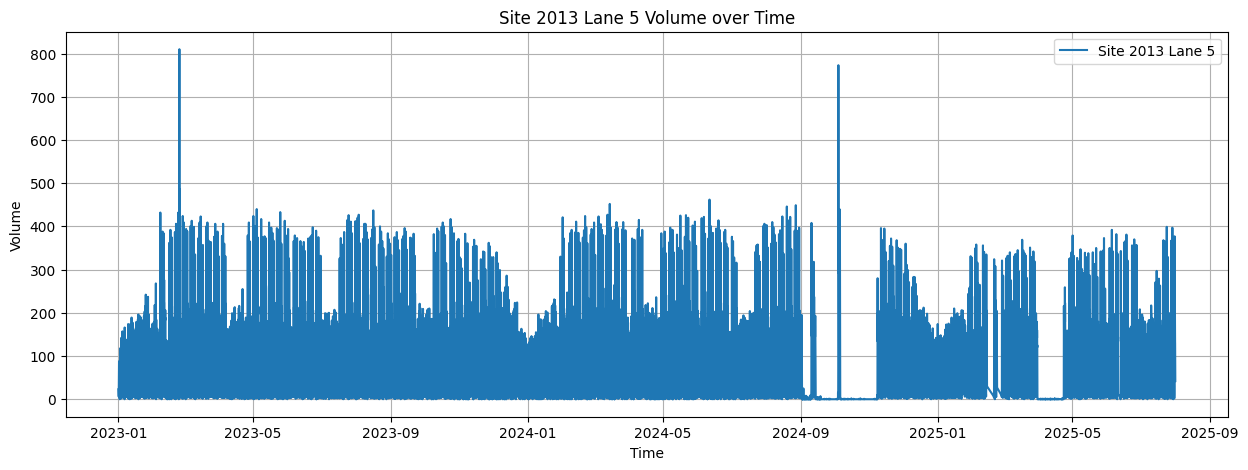

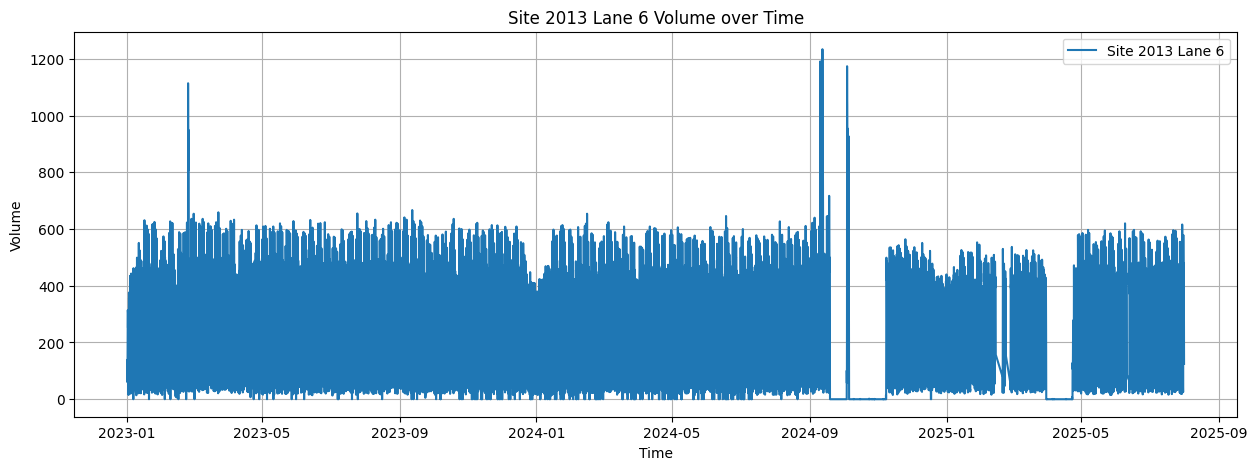

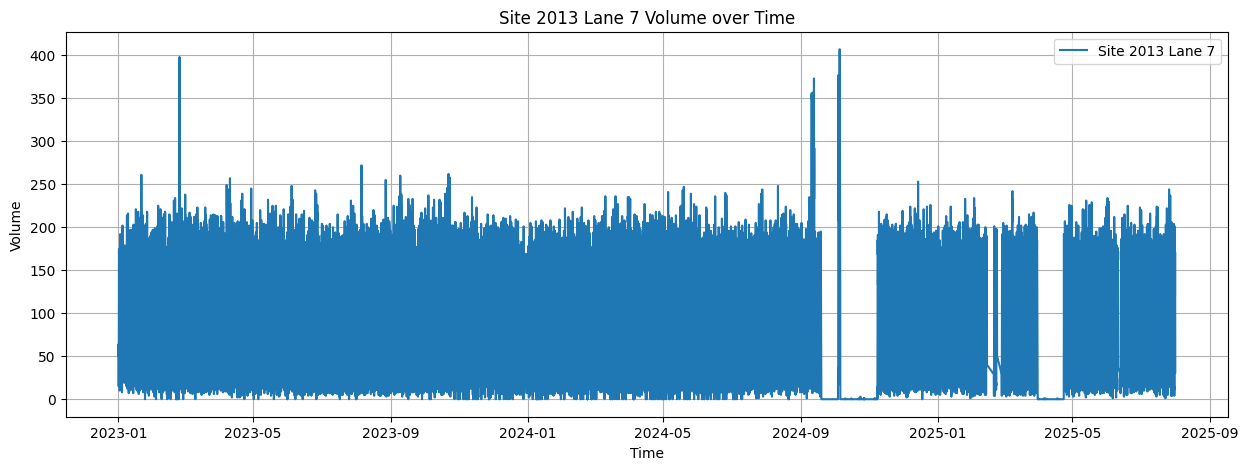

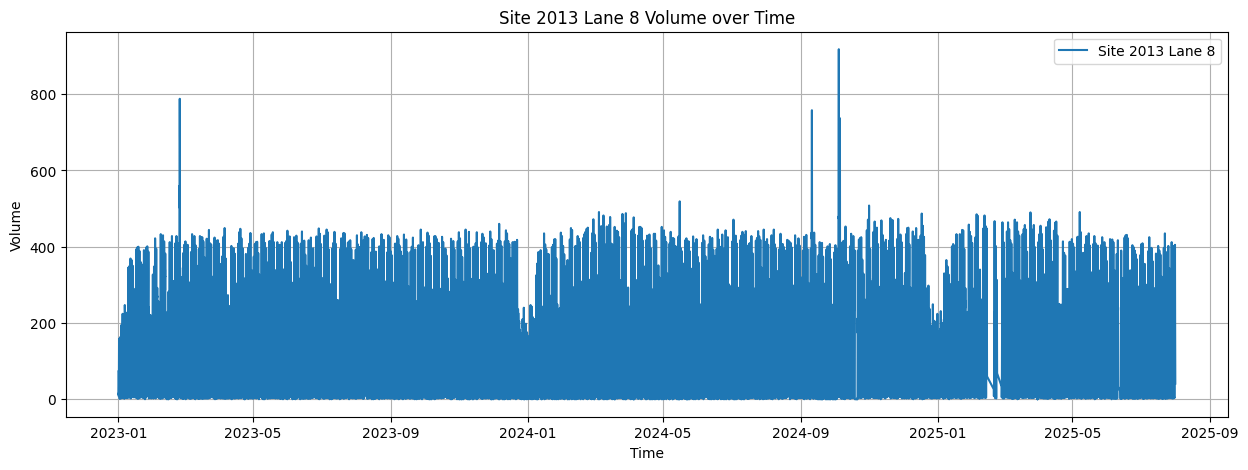

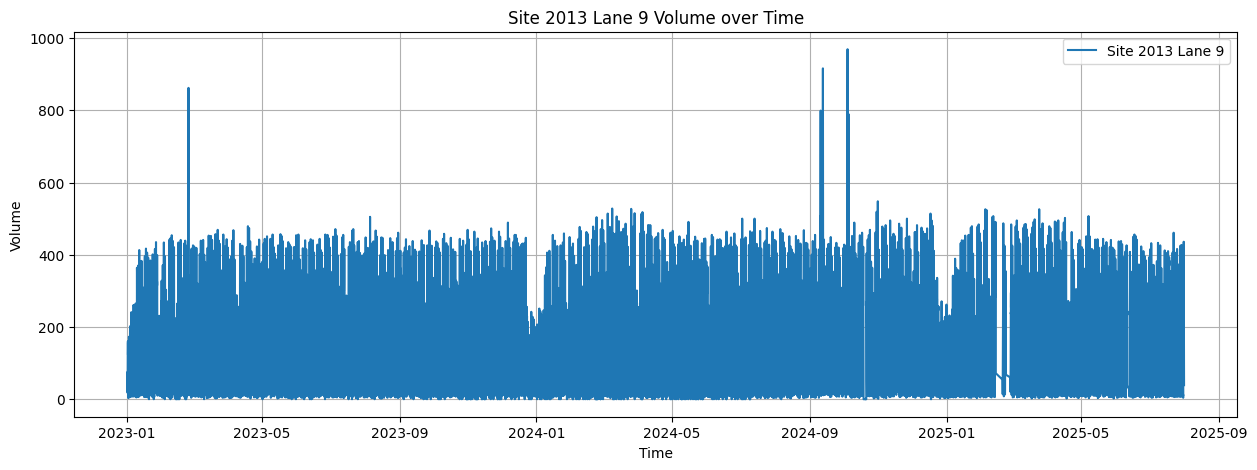

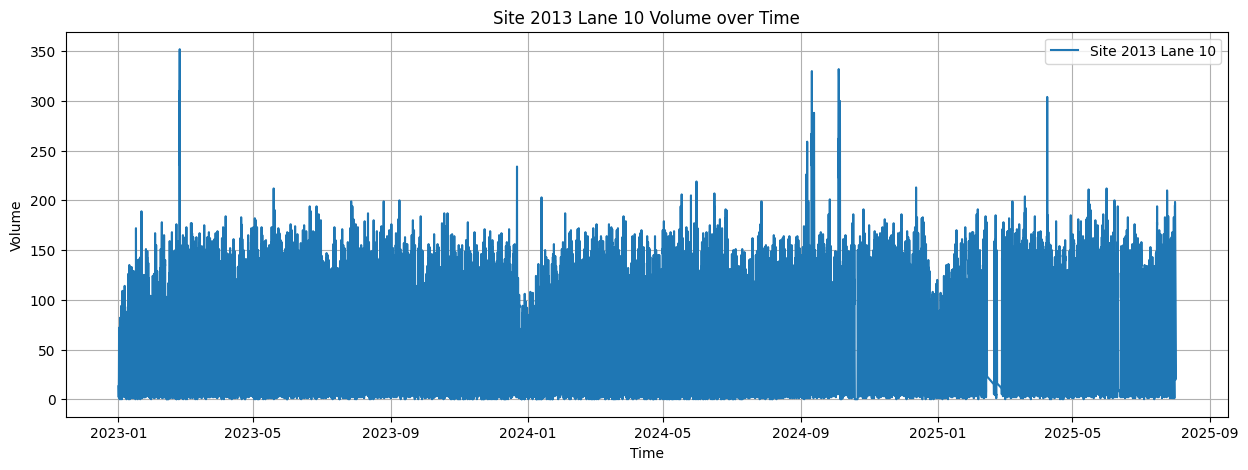

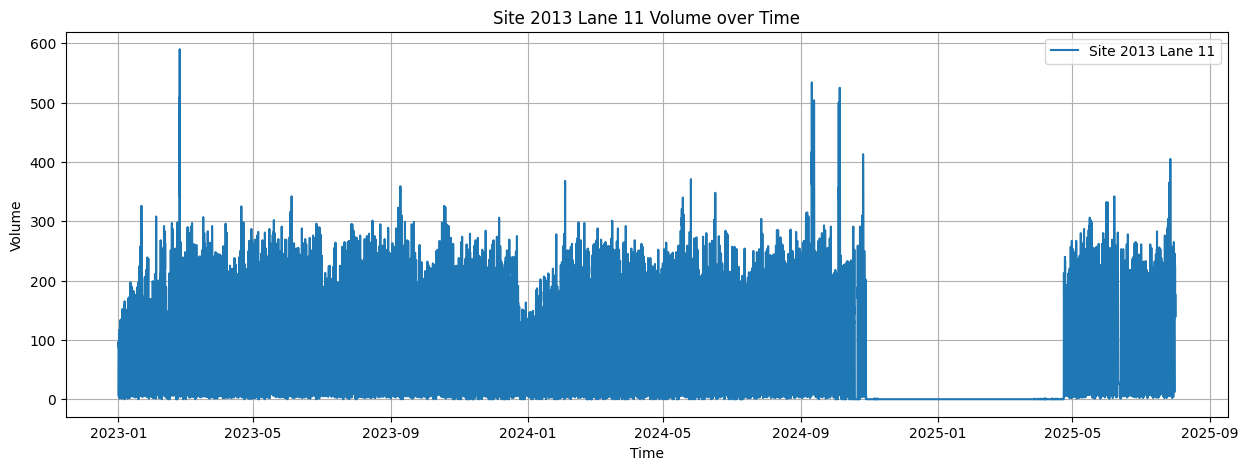

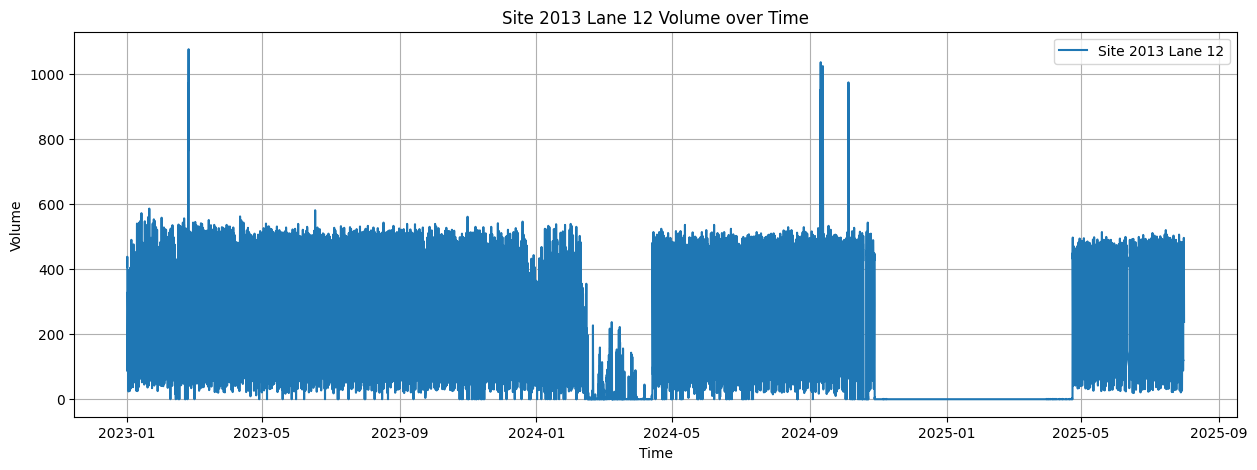

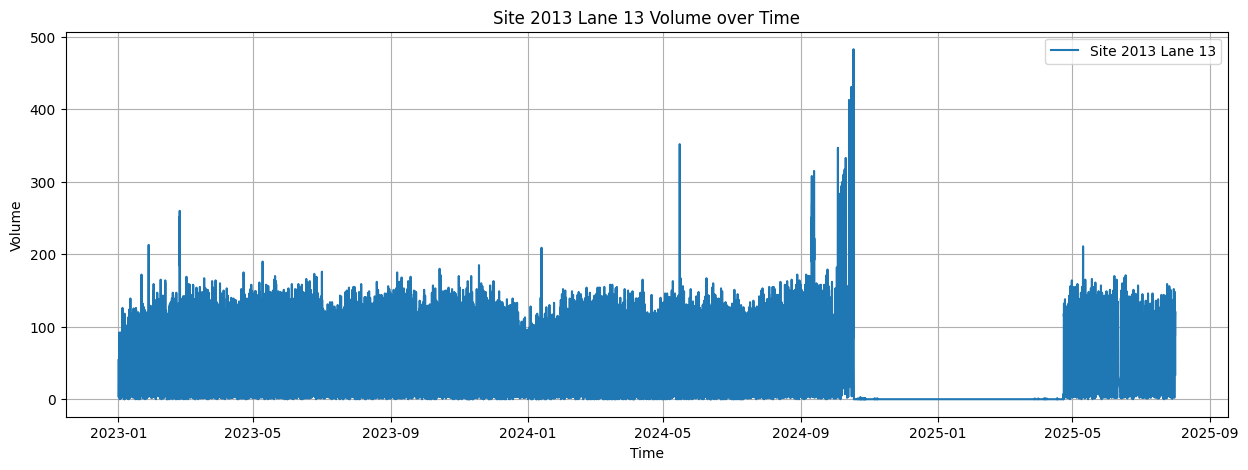

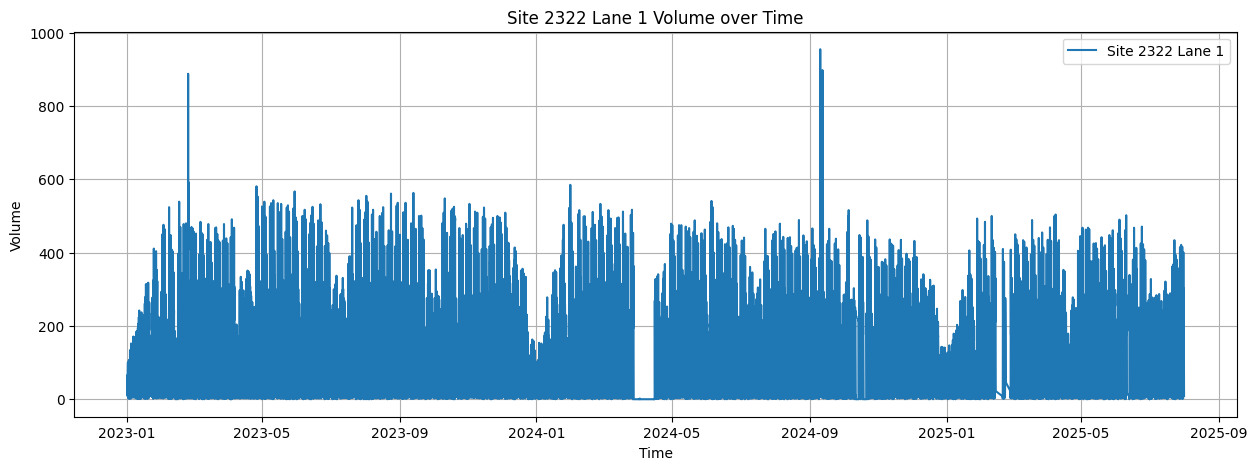

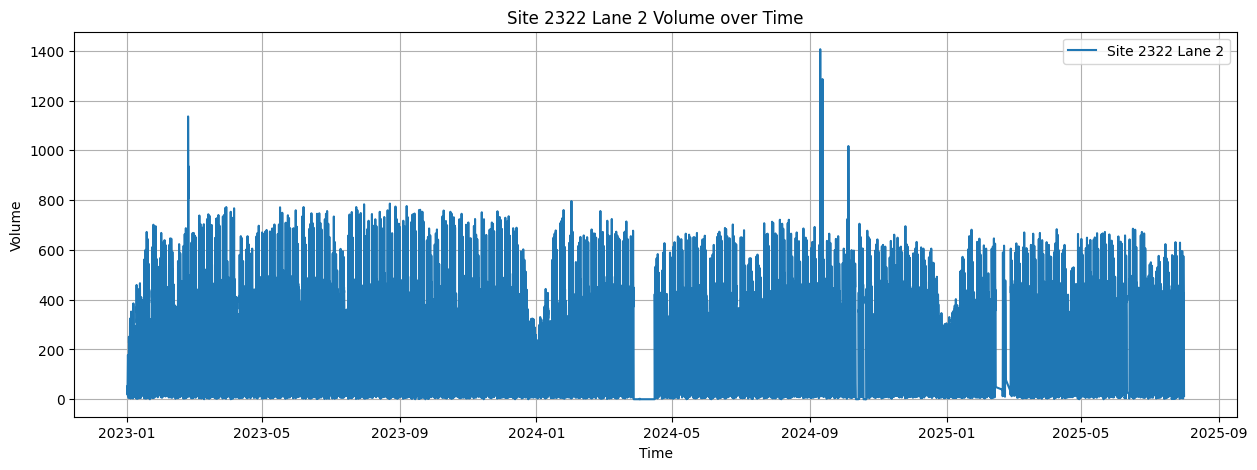

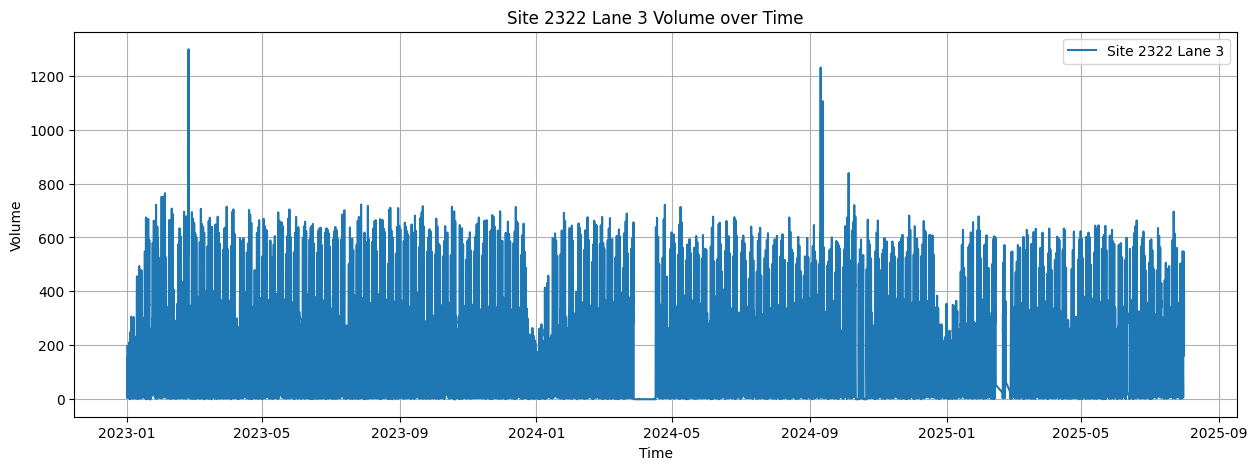

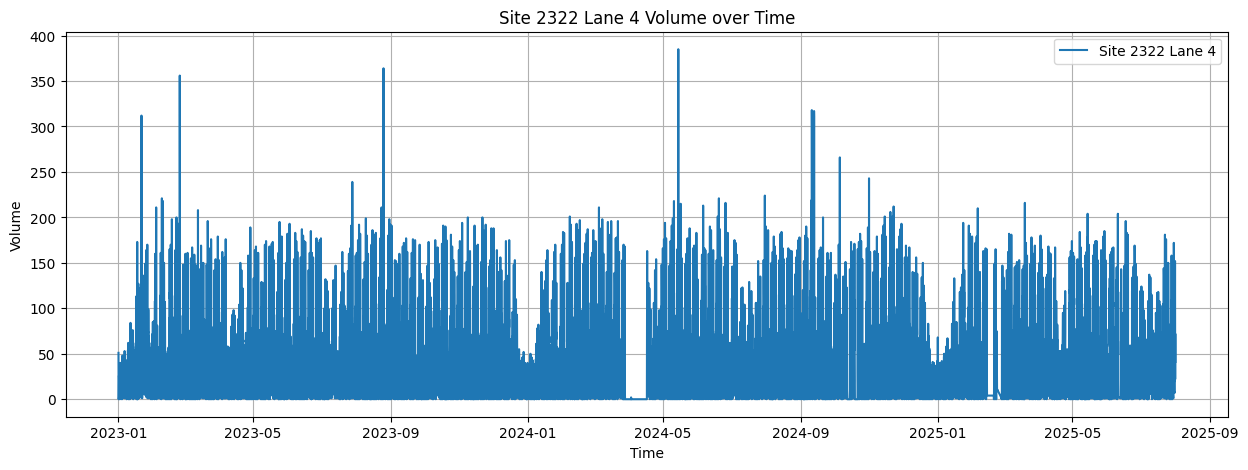

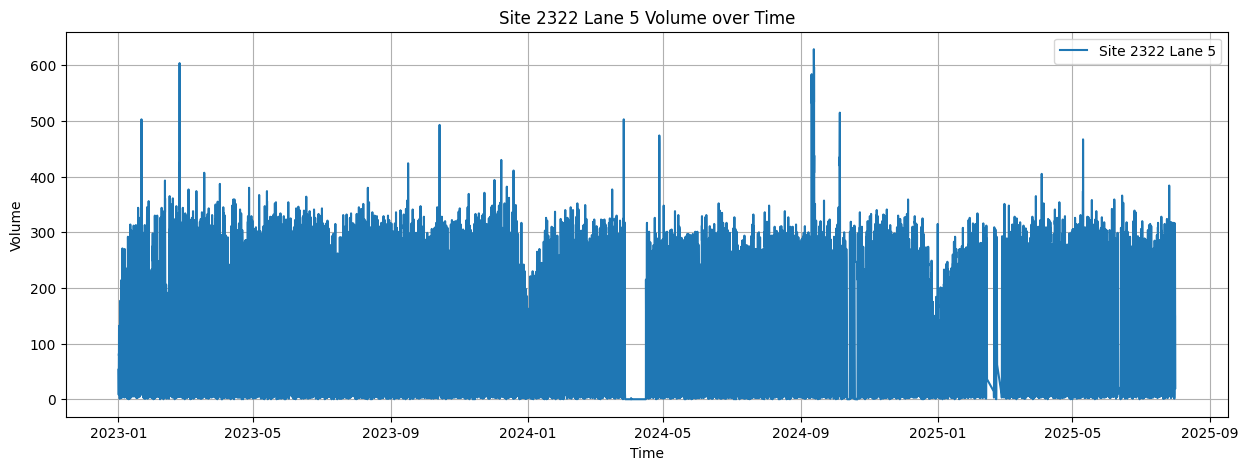

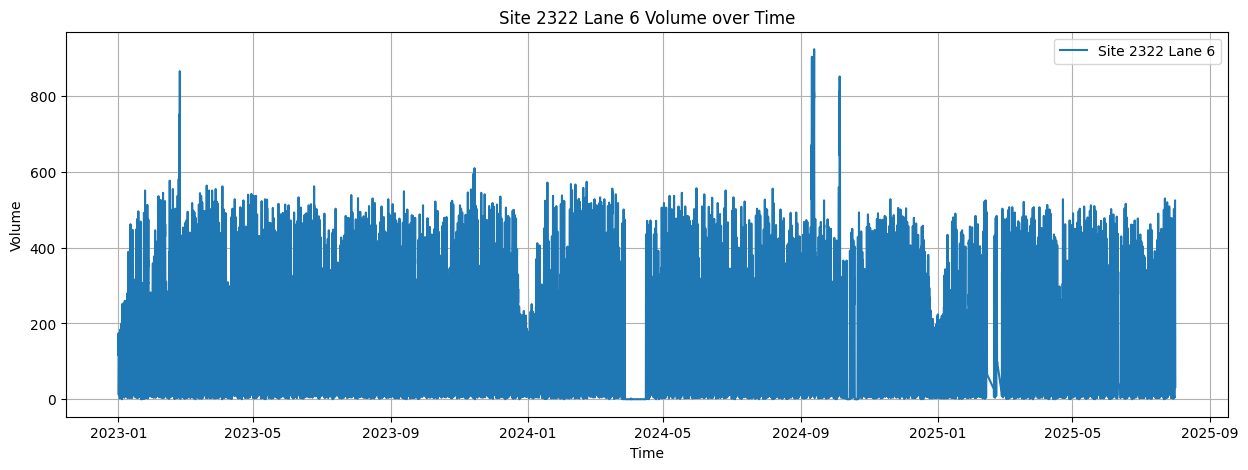

In [ ]:
site = df['Detector_ID'].unique()
for s in site:
    site_df = df[df['Detector_ID'] == s]
    lane = site_df['Lane'].unique()
    lane = np.sort(lane)
    # plt.figure(figsize=(15, 5 * len(lane)))
    for i, l in enumerate(lane):
        plt.figure(figsize=(15, 5))
        lane_df = site_df[site_df['Lane'] == l].sort_index()
        plt.plot(lane_df.index, lane_df['Volume'],'-', label=f'Site {s} Lane {l}')
        plt.title(f'Site {s} Lane {l} Volume over Time')
        plt.xlabel('Time')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid()
        # save figure
        output_dir = f'../results/site_plot/site_{s}/'
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f'{output_dir}site_{s}_lane_{l}_volume.png')
        plt.close()